importing neccessary libraries

In [50]:
import pandas as pd # for handling data
import numpy # for numerical computations

importing the dataset

In [51]:
df = pd.read_csv("/content/data.csv", encoding="ISO-8859-1")

<ipython-input-51-ec8a77234f1a>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data.csv", encoding="ISO-8859-1")


Display the first 5 rows of the dataset

In [52]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


Basic info of the dataset like column names, data types, and missing values.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

Checking for missing values

In [54]:
df.isnull().sum()

,0
stn_code,144077
sampling_date,3
state,0
location,3
agency,149481
type,5393
so2,34646
no2,16233
rspm,40222
spm,237387


Columns like stn_code, agency and spm are not useful due to missing values

In [55]:
df.drop(columns=['stn_code','agency','spm'], inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sampling_date                435739 non-null  object 
 1   state                        435742 non-null  object 
 2   location                     435739 non-null  object 
 3   type                         430349 non-null  object 
 4   so2                          401096 non-null  float64
 5   no2                          419509 non-null  float64
 6   rspm                         395520 non-null  float64
 7   location_monitoring_station  408251 non-null  object 
 8   pm2_5                        9314 non-null    float64
 9   date                         435735 non-null  object 
dtypes: float64(4), object(6)
memory usage: 33.2+ MB


Handling Missing Values

Filling numerical columns with median


In [56]:
df['so2'].fillna(df['so2'].median(), inplace = True)
df['no2'].fillna(df['no2'].median(), inplace = True)
df['rspm'].fillna(df['rspm'].median(), inplace = True)

<ipython-input-56-6a279238be9e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['so2'].fillna(df['so2'].median(), inplace = True)
<ipython-input-56-6a279238be9e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Filling categorical columns with mode


In [57]:
df['location'].fillna(df['location'].mode()[0], inplace = True)
df['type'].fillna(df['type'].mode()[0], inplace = True)
df['location_monitoring_station'].fillna(df['location_monitoring_station'].mode()[0], inplace = True)

<ipython-input-57-05a55a8b7ab6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna(df['location'].mode()[0], inplace = True)
<ipython-input-57-05a55a8b7ab6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Checking missing values again

In [58]:
df.isnull().sum()

,0
sampling_date,3
state,0
location,0
type,0
so2,0
no2,0
rspm,0
location_monitoring_station,0
pm2_5,426428
date,7


Handling the 'pm2_5' column (Target Variable)

In [59]:
# drop rows where pm2_5 is missing
df = df.dropna(subset=['pm2_5'])

# Reset the index after droping the rows
df.reset_index(drop=True, inplace=True)

# Updated shape of the dataset
df.shape

(9314, 10)

Converting sampling_date and date Columns to Datetime Format

In [60]:
df['sampling_date'] = pd.to_datetime(df['sampling_date'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

<ipython-input-60-4b4e7e0165c9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sampling_date'] = pd.to_datetime(df['sampling_date'], errors='coerce')
<ipython-input-60-4b4e7e0165c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sampling_date'] = pd.to_datetime(df['sampling_date'], errors='coerce')
<ipython-input-60-4b4e7e0165c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [61]:
# Checking the data type to confirm the change
df.dtypes

,0
sampling_date,datetime64[ns]
state,object
location,object
type,object
so2,float64
no2,float64
rspm,float64
location_monitoring_station,object
pm2_5,float64
date,datetime64[ns]


Extracting useful data features

In [62]:
# Extract year, month and day from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

<ipython-input-62-175448ac41a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
<ipython-input-62-175448ac41a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-62-175448ac41a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [63]:
# Displaying the first 5 rows to check the extracted features
df[['date','year','month','day']].head()

,date,year,month,day
0,2015-08-06,2015,8,6
1,2015-08-10,2015,8,10
2,2015-08-13,2015,8,13
3,2015-08-20,2015,8,20
4,2015-08-24,2015,8,24


Plotting PM2.5 trends over time

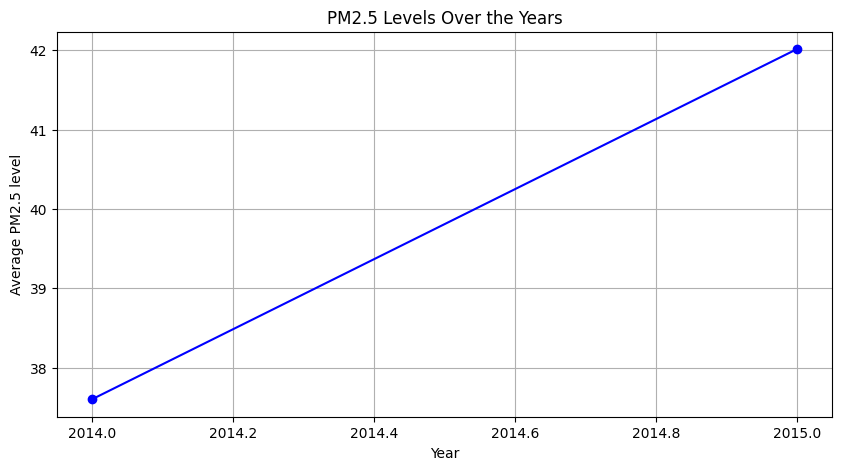

In [64]:
# import matplotlib for visualization
import matplotlib.pyplot as plt

# Group data by year and calculate the mean PM2.5 level
yearky_pm25 = df.groupby('year')['pm2_5'].mean()

# Plot the trend
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(yearky_pm25.index, yearky_pm25.values, marker = 'o', linestyle = "-", color = "b")

# Add labels and titles
plt.xlabel("Year")
plt.ylabel("Average PM2.5 level")
plt.title("PM2.5 Levels Over the Years")
plt.grid(True)
plt.show()

Plotting PM2.5 Monthly Trends

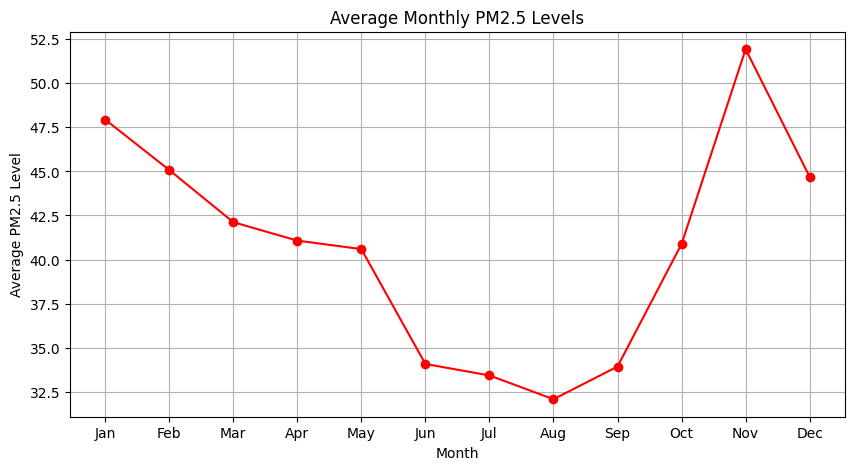

In [65]:
# Group data by month and calculate the mean PM2.5 level
monthly_pm25 = df.groupby('month')['pm2_5'].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_pm25.index, monthly_pm25.values, marker='o', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Level')
plt.title('Average Monthly PM2.5 Levels')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


Analysing PM2.5 levels across each state

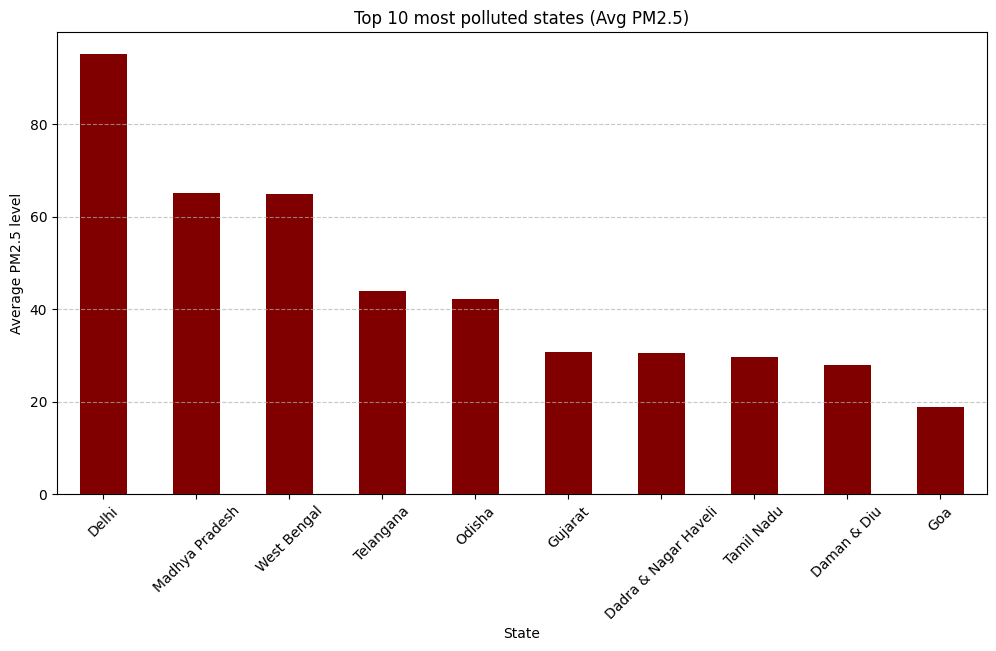

In [66]:
# Group data by state and calculating mean PM2.5 leveks
state_pm25 = df.groupby('state')['pm2_5'].mean().sort_values(ascending = False)

# Plotting the 10 most polluted states
plt.figure(figsize=(12,6))
state_pm25.head(10).plot(kind = "bar", color = "maroon")

# Formatting the plot
plt.xlabel("State")
plt.ylabel("Average PM2.5 level")
plt.title("Top 10 most polluted states (Avg PM2.5)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle = "--",alpha = 0.7)
plt.show()

Checking correlations between pollutants

In [67]:
# Compute correlation matrix
correlation_matrix = df[['so2','no2','rspm','pm2_5']].corr()

# Display correlation matrix
correlation_matrix

,so2,no2,rspm,pm2_5
so2,1.000000,0.107906,0.072895,0.035163
no2,0.107906,1.000000,0.490117,0.505456
rspm,0.072895,0.490117,1.000000,0.749631
pm2_5,0.035163,0.505456,0.749631,1.000000


Feature Selection based on correlation analysis

In [68]:
# Selecting only numerical columns for correlation computation
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix only on numerical data
correlation_matrix = numerical_df.corr()

# Selecting features with a strong correlation (above 0.5) with PM2.5
corr_threshold = 0.5  # Define a threshold
selected_features = correlation_matrix[abs(correlation_matrix["pm2_5"]) > corr_threshold]["pm2_5"].index.tolist()

# Removing PM2.5 itself from the list
selected_features.remove("pm2_5")

# Display selected features
selected_features

['no2', 'rspm']

 Splitting the Data into Train and Test Sets

In [69]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = df[selected_features]  # Features selected from correlation
y = df["pm2_5"]  # Target variable

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7451, 2), (1863, 2), (7451,), (1863,))

Building a Predictive Model

In [70]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)


Intercept: -4.427481417761044
Coefficients: [0.41617881 0.39092507]


Model Prediction and Evaluation

In [71]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict PM2.5 values for test data
y_pred = lr_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Absolute Error: 11.907906027378203
R² Score: 0.553818298591098


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor with default parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f"Mean Absolute Error (RF): {mae_rf}")
print(f"R² Score (RF): {r2_rf}")


Mean Absolute Error (RF): 11.670131805697942
R² Score (RF): 0.5025937850912906


Understanding Feature Importance in Random Forest

In [73]:
# Get feature importance from the trained Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df)


  Feature  Importance
1    rspm    0.793541
0     no2    0.206459


Training an XGBoost Model

In [74]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare data (only using important features)
X = df[['rspm', 'no2']]
y = df['pm2_5']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (XGBoost): {mae_xgb}")
print(f"R² Score (XGBoost): {r2_xgb}")


Mean Absolute Error (XGBoost): 10.948309237932174
R² Score (XGBoost): 0.542553187245179


Time-Series Analysis: PM2.5 Trends Over Time

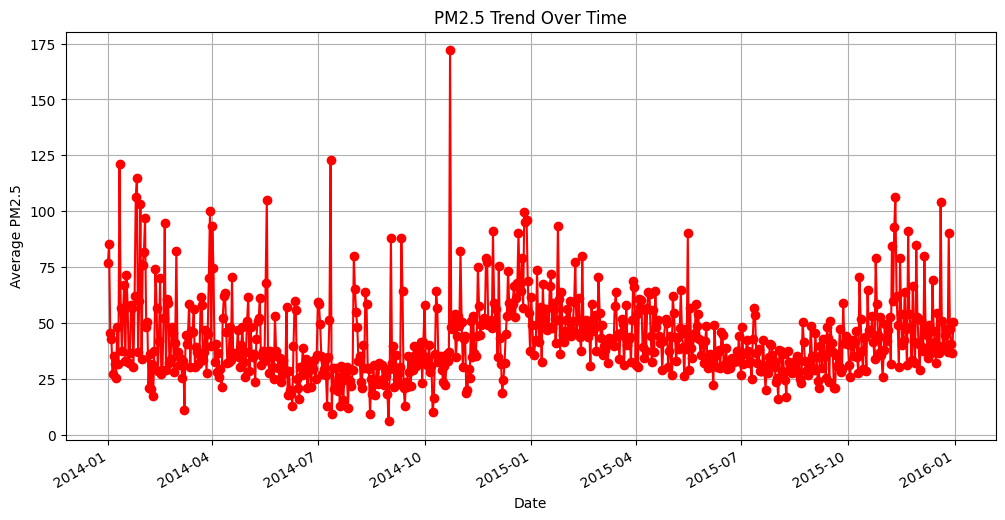

In [75]:
plt.figure(figsize=(12,6))
df.groupby('date')['pm2_5'].mean().plot(kind='line', color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Average PM2.5')
plt.title('PM2.5 Trend Over Time')
plt.grid(True)
plt.show()

Seasonal Trends: Monthly Averages of PM2.5

<ipython-input-76-d55a24f27a5b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")


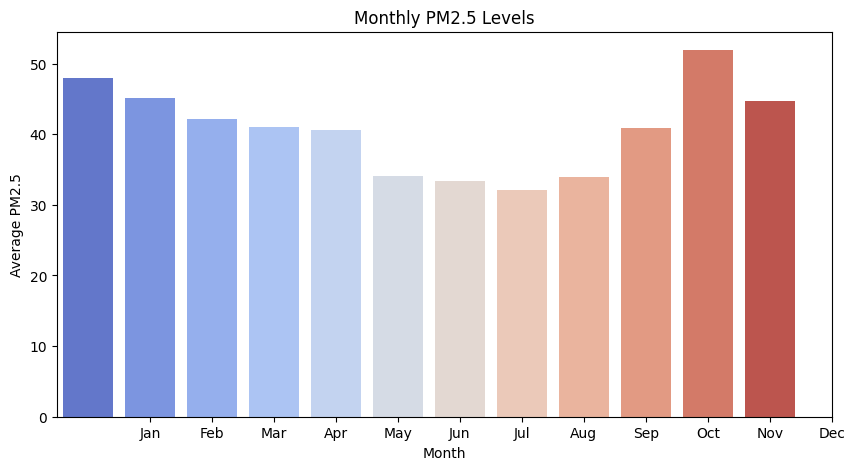

In [76]:
import seaborn as sns
df['month'] = df['date'].dt.month  # Extract month
monthly_avg = df.groupby('month')['pm2_5'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.title("Monthly PM2.5 Levels")
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Geographical Impact: Top Polluted Cities

<ipython-input-77-dd1da1cdacdd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="Reds_r")


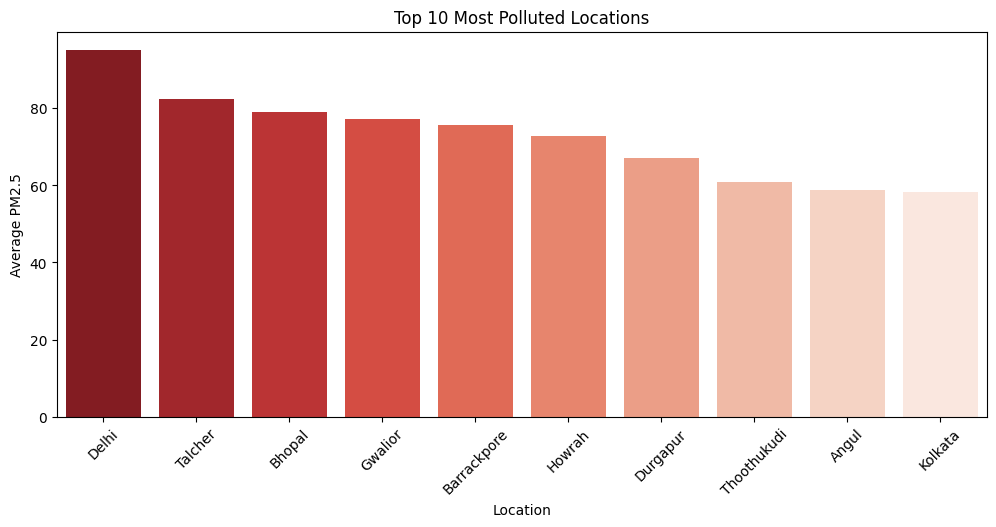

In [77]:
top_cities = df.groupby('location')['pm2_5'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="Reds_r")
plt.xlabel("Location")
plt.ylabel("Average PM2.5")
plt.title("Top 10 Most Polluted Locations")
plt.xticks(rotation=45)
plt.show()


 Pollutant Comparison: How NO2, SO2, and RSPM Affect PM2.5

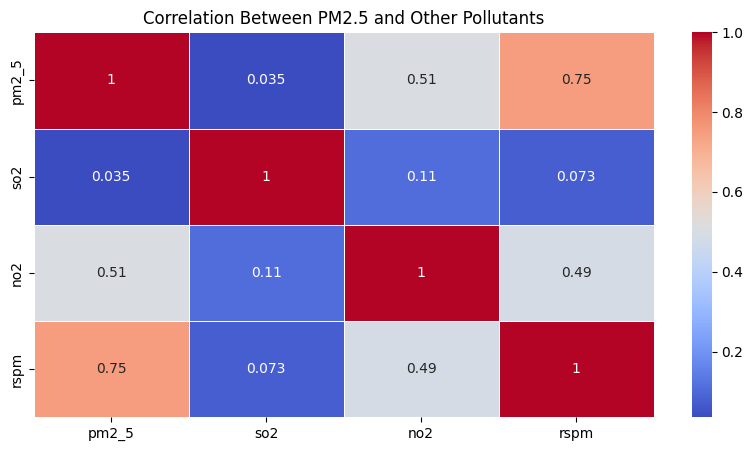

In [78]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['pm2_5', 'so2', 'no2', 'rspm']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between PM2.5 and Other Pollutants")
plt.show()